In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

Загрузка данных:

In [2]:
X_train = []

for i in range(1):
    X_train.append(pd.read_csv(
            './data_csv/ECoG_X_train/ECoG_X_train_{0}.csv'.format(i+1),
            header=None))
    
X_train = pd.concat(X_train, axis=1, ignore_index=True).values

In [3]:
X_test = []

for i in range(1):
    X_test.append(pd.read_csv(
            './data_csv/ECoG_X_test/ECoG_X_test_{0}.csv'.format(i+1),
            header=None))
    
X_test = pd.concat(X_test, axis=1, ignore_index=True).values

In [4]:
Y_train = pd.read_csv('./data_csv/ECoG_Y_train.csv', header=None).values
Y_test = pd.read_csv('./data_csv/ECoG_Y_test.csv', header=None).values

Конструируем алгоритмы отбора признаков и модели:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from selector import Selector, LinearGeneticSelector
from qpfs import QPFS

s = Selector(QPFS(), "QPFS")
gen = LinearGeneticSelector(generation_size=2)
lin = LinearRegression()
pls = PLSRegression()

Импортируем метрики:

In [6]:
from metric_classes import *

metric1 = RSS()
metric2 = Adjusted_Determination_Coefficient()
metric3 = Determination_Coefficient()
metric4 = VIF()
metric5 = BIC()
char1 = Condition_Number()
comp1 = Cp()

In [7]:
from model_comparison import *

c = ModelComparison([[s, lin], [s, pls]])
c.fit(X_train, Y_train, ns_features=np.arange(2, X_train.shape[1], 10))

In [8]:
c.evaluate([metric1, metric2, metric3, metric4, metric5],
                           [comp1], [char1], mode='dynamic')

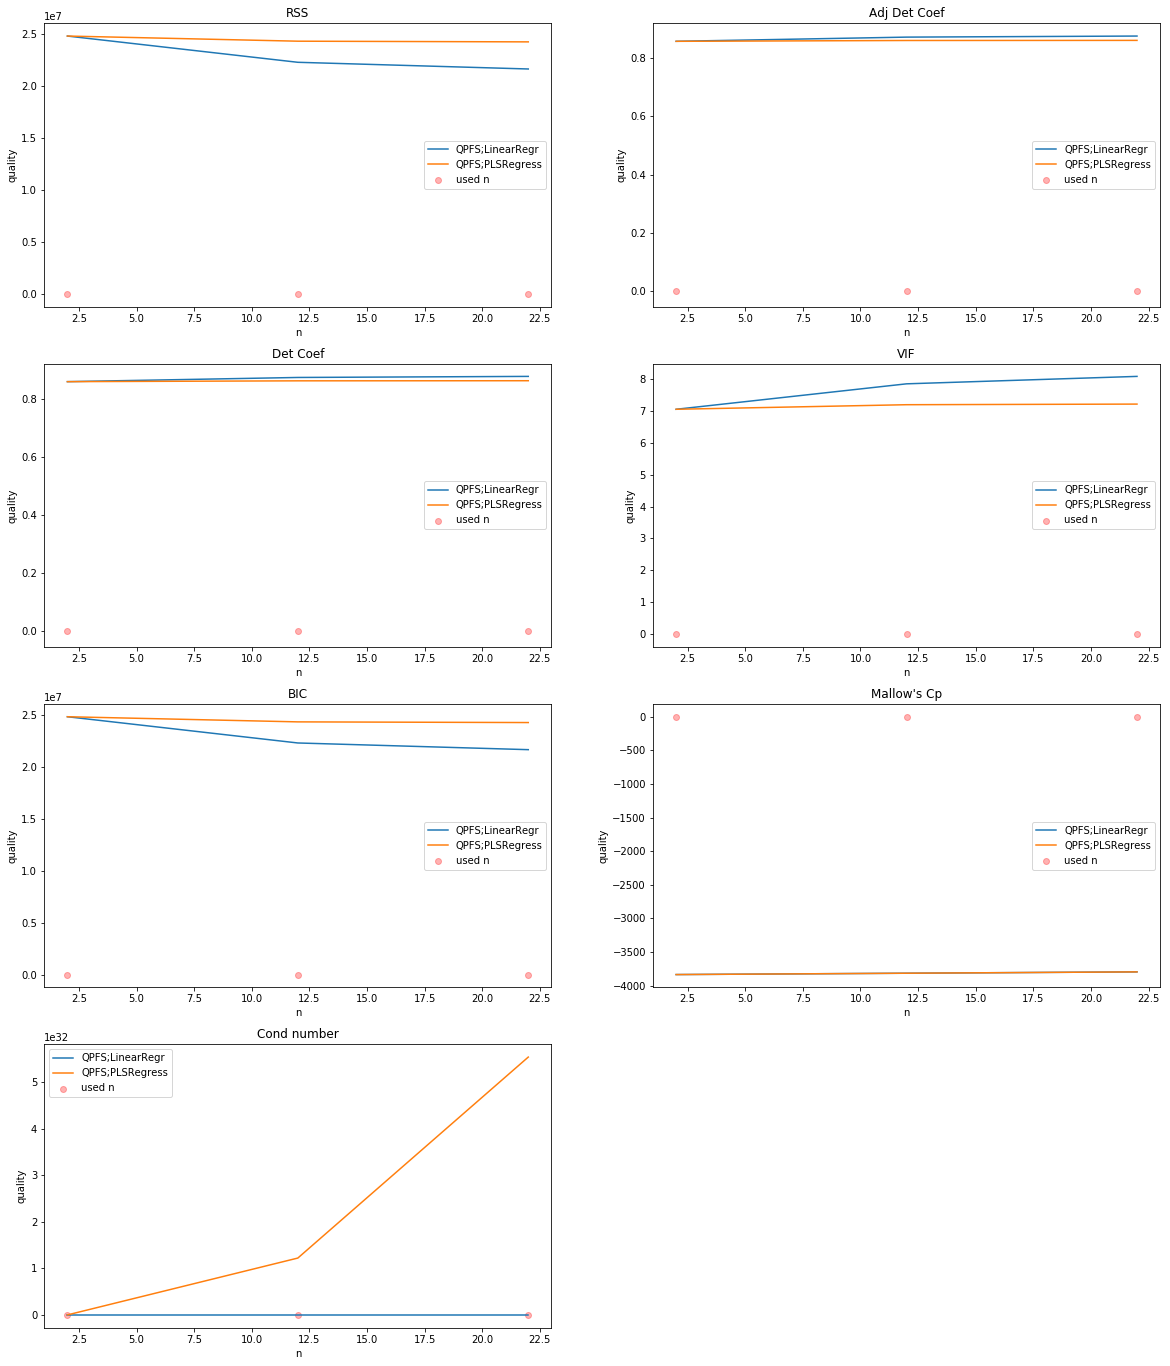

In [9]:
c.draw_quality()